In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import unique
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
import missingno as msno

## **Data Cleaning**

### **Column Description**

* #### survival: Survival (0 = No; 1 = Yes)
* #### class: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* #### name: Name
* #### sex: Sex
* #### age: Age
* #### sibsp: Number of Siblings/Spouses Aboard
* #### parch: Number of Parents/Children Aboard
* #### ticket: Ticket Number
* #### fare: Passenger Fare
* #### cabin: Cabin
* #### embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* #### boat: Lifeboat (if survived)
* #### body: Body number (if did not survive and body was recovered)

In [2]:
# Setup base paths
data_path = "./data/"

In [3]:
# Read the dataset
titanic_train_df = pd.read_csv(data_path + "train.csv")
titanic_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Check columns and their types
titanic_train_df.columns, titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'), None)

In [5]:
# Get a statistical description of the data
titanic_train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Shorney, Mr. Charles Joseph",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Check to see if any column has a single value
# Columns that have a single value for all rows do not contain any information for modeling
# Depending on the choice of data preparation and modeling algorithms, variables with a single value can also cause errors or unexpected results
# Variables or columns that have a single value should probably be removed from your dataset
titanic_train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# Summarize the percentage of unique values for each column
for i in range(titanic_train_df.shape[1]):
    num = titanic_train_df.iloc[:, i].nunique()
    percentage = float(num) / titanic_train_df.shape[0] * 100
    if percentage < 1:
        print((i, num, percentage))

(1, 2, 0.22446689113355783)
(2, 3, 0.33670033670033667)
(4, 2, 0.22446689113355783)
(6, 7, 0.7856341189674524)
(7, 7, 0.7856341189674524)
(11, 3, 0.33670033670033667)


### **Inference**

#### There's no column with single unique values.
#### The percentage of unique values for the columns - Survived, Pclass, Sex, SibSp, Parch, Embarked is less than 1%. Since these could be columns with ordinal/categorical values, they cannot be removed.

In [8]:
# Check to see if any column has low variance
# Columns that have low variance do not contain any information for modeling.
data = titanic_train_df[list(titanic_train_df.select_dtypes(exclude=['object']).columns)].values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# Define the transform
transform = VarianceThreshold(threshold=0)
# Transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(891, 6) (891,)
(891, 6)


In [9]:
# Check to see duplicate rows
# Rows that have identical data are probably useless, if not dangerously misleading during model evaluation
dups = titanic_train_df.duplicated()
# Report if there are any duplicates
print(dups.any())
# List all duplicate rows
print(titanic_train_df[dups])

False
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


### **Inference**

#### None of the columns in the dataset have variance less than threshold=0.
#### There are no duplicates in the dataset.

## **Exploratory Data Analysis**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

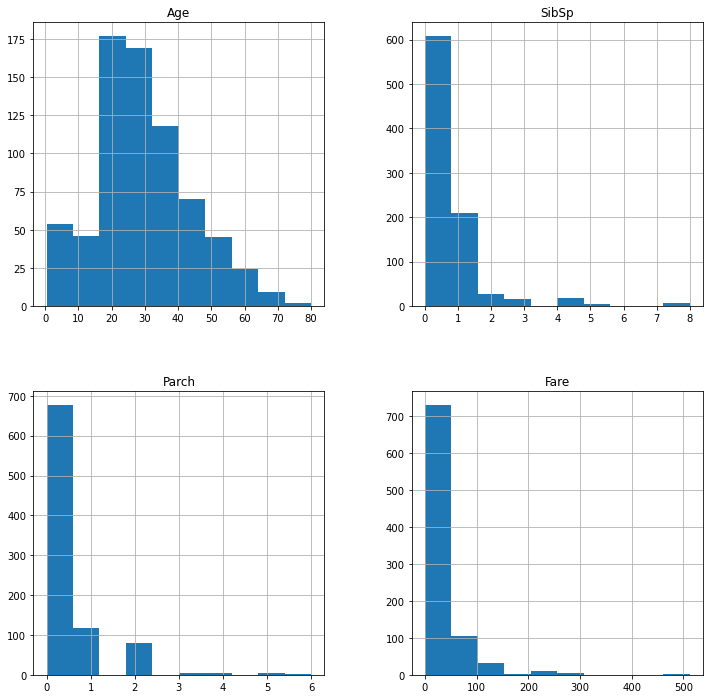

In [10]:
# Check Distributions 
titanic_train_df_num = titanic_train_df[['Age', 'SibSp', 'Parch', 'Fare']]
titanic_train_df_cat = titanic_train_df[['Survived', 'Pclass', 'Sex', 'Ticket','Cabin', 'Embarked']]

# For checking distribution of numeric columns - use histogram
titanic_train_df_num.hist(figsize=(12,12))

### **Inference**
#### From the histograms:

* #### Age has fairly normal distribution.
* #### SibSp, Parch, Fare has right skewed distributions.

#### We can consider normalizing SibSp, Parch, Fare before scaling the dataset.

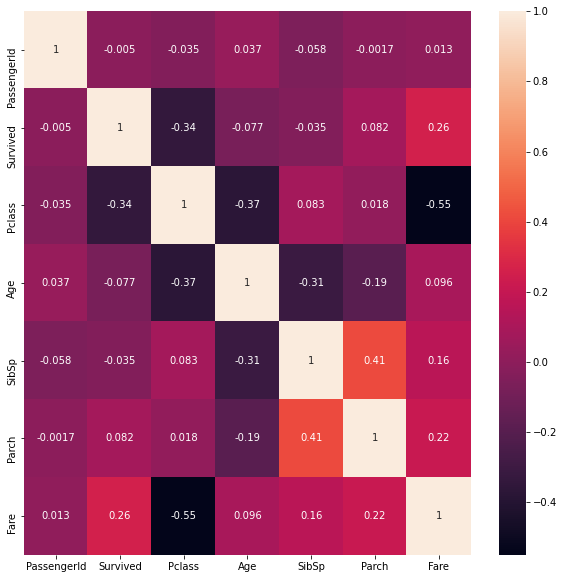

In [11]:
# See correlation between features using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(titanic_train_df.corr(), annot=True)
plt.show()

### **Inference**
#### Compare correlation between Survived (target variable) with other features.

* #### Survived, Pclass - Negatively correlated which means people of higher class (1 > 2 > 3) have higher chance of survival.
* #### Survived, Age - Negatively correlated which means people of lower age have higher chance of survival.
* #### Survived, Sibsp - Negatively correlated which means people with more no:of siblings/spouses have lesser chance of survival.
* #### Survived, Parch - Positively correlated which means people with more no:of parents/children have higher chance of survival.
* #### Survived, Fare - Positively correlated which means people who gave more fare (upper class passengers) have higher chance of survival.

In [12]:
# Compare Average Survival Rate across 'Age', 'SibSp', 'Parch', 'Fare'
pd.pivot_table(titanic_train_df, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


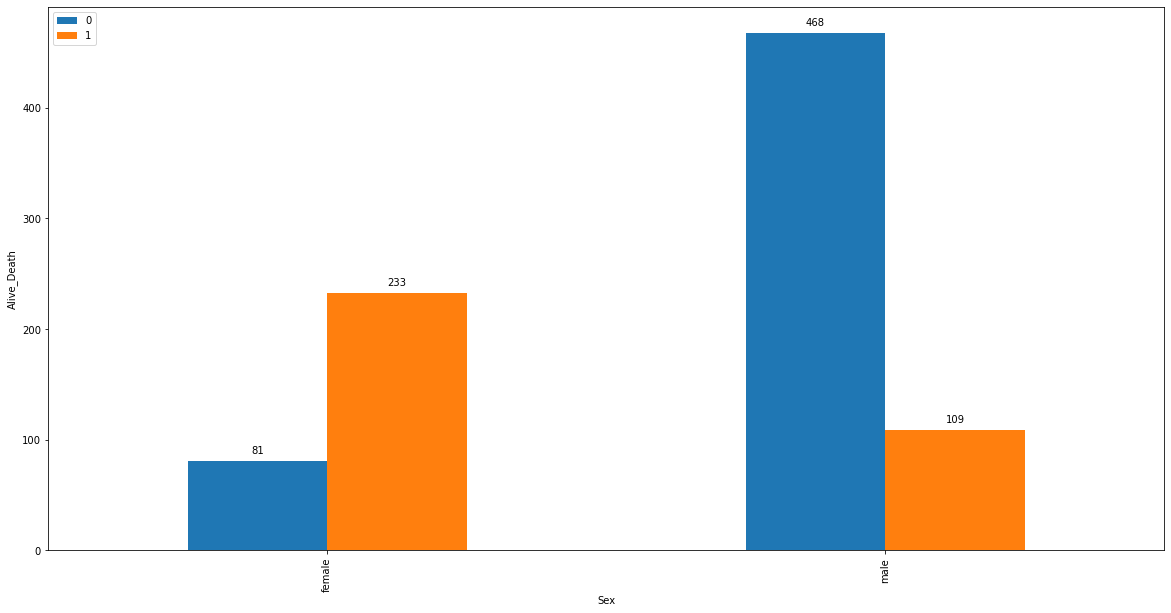

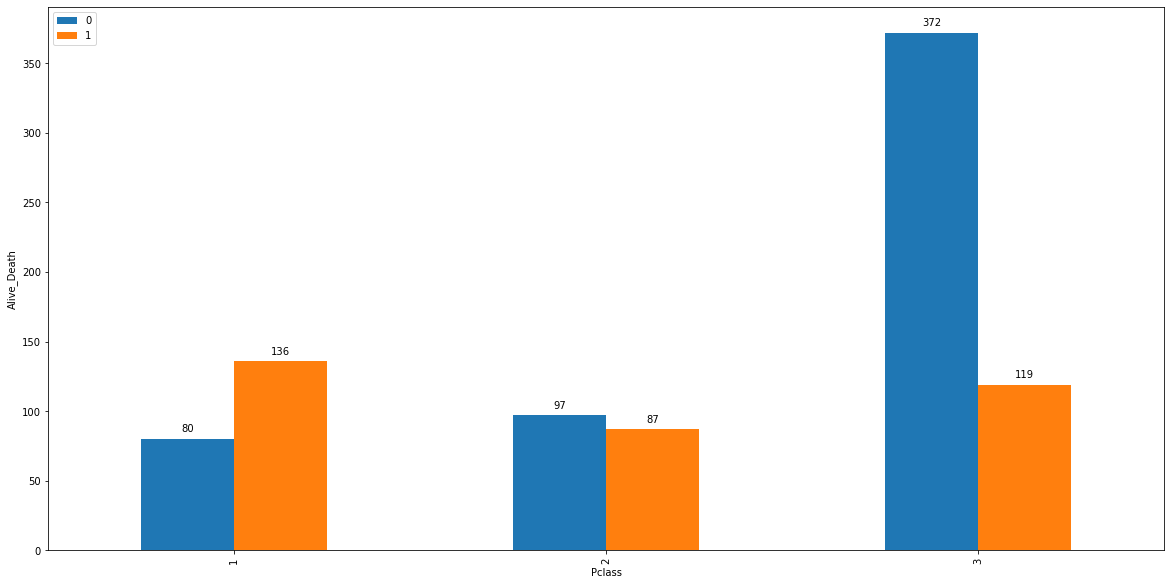

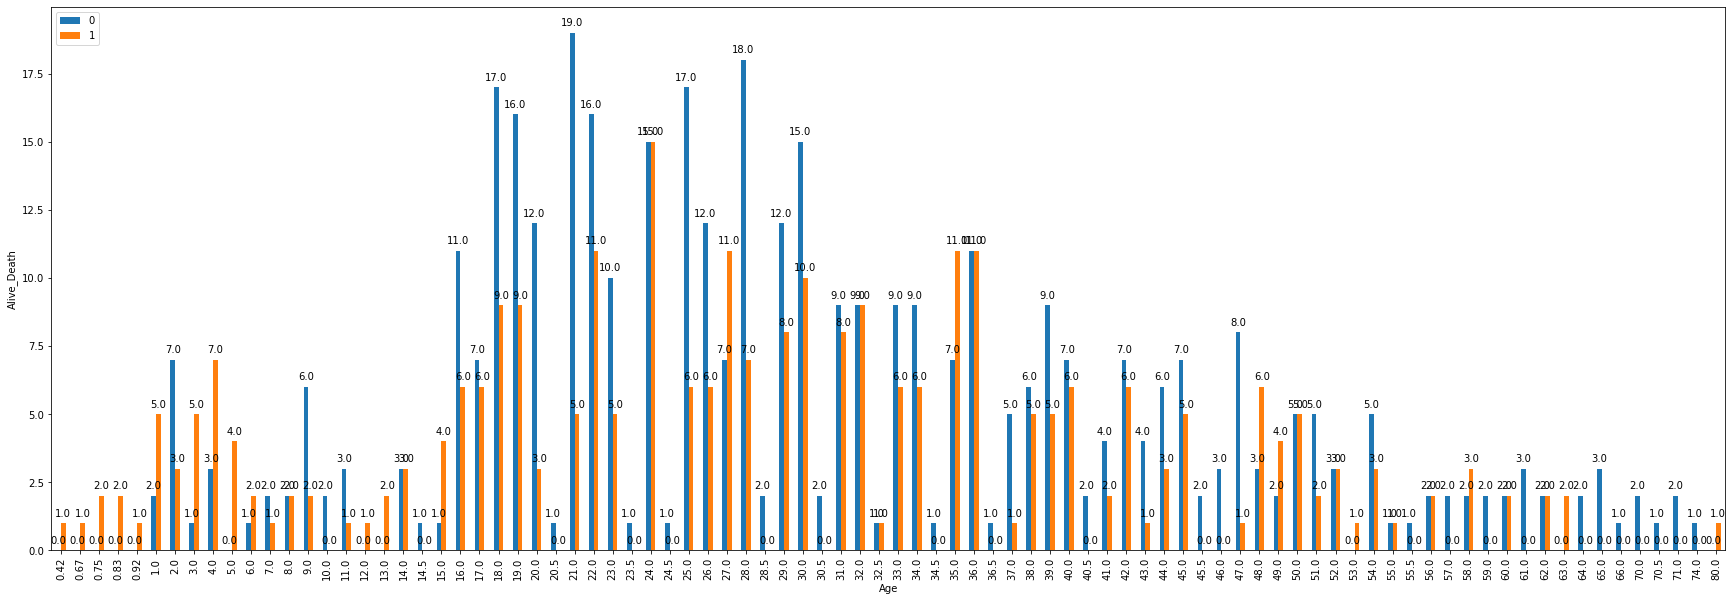

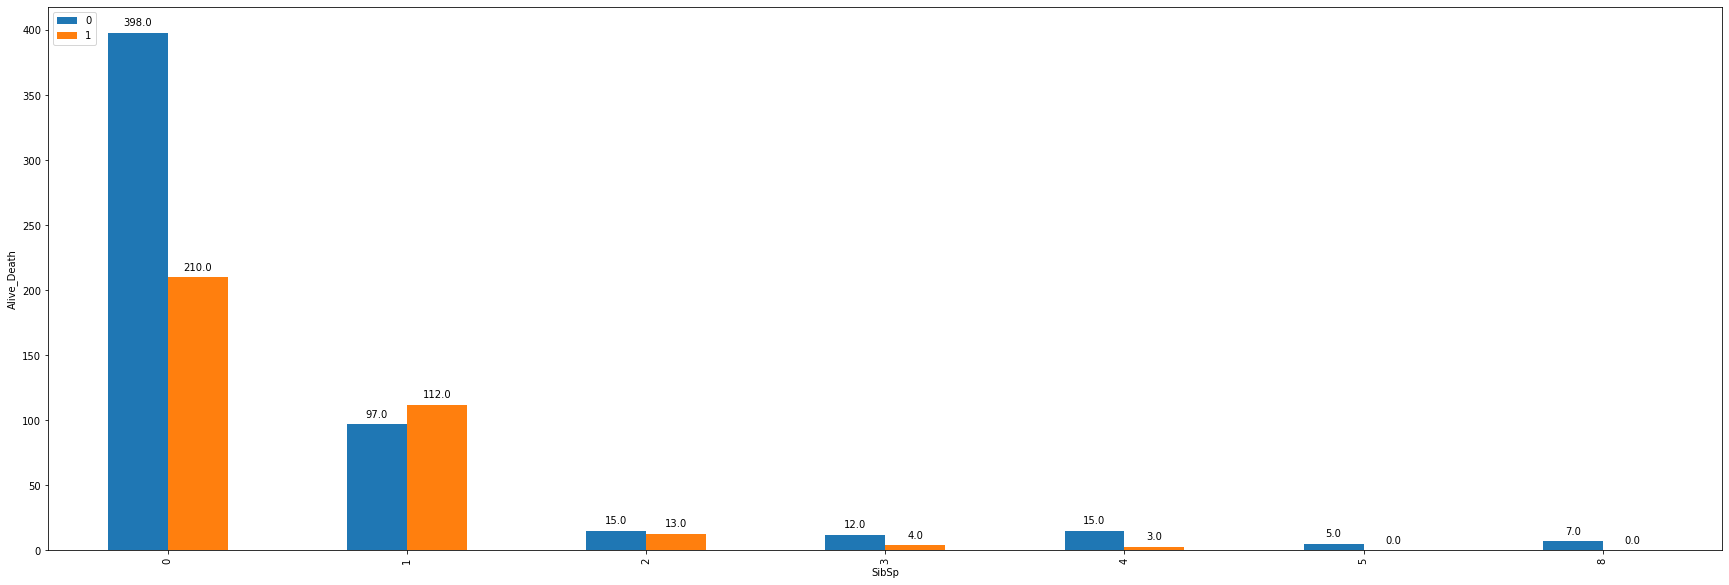

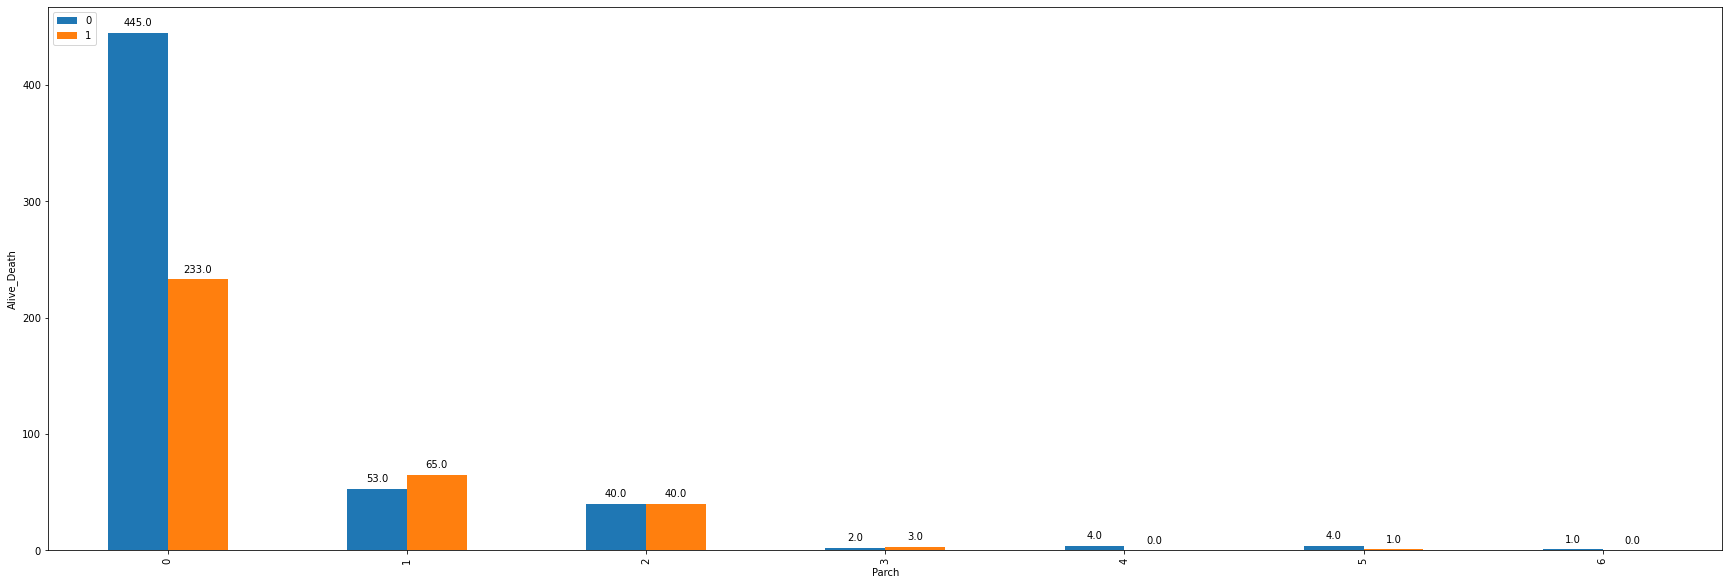

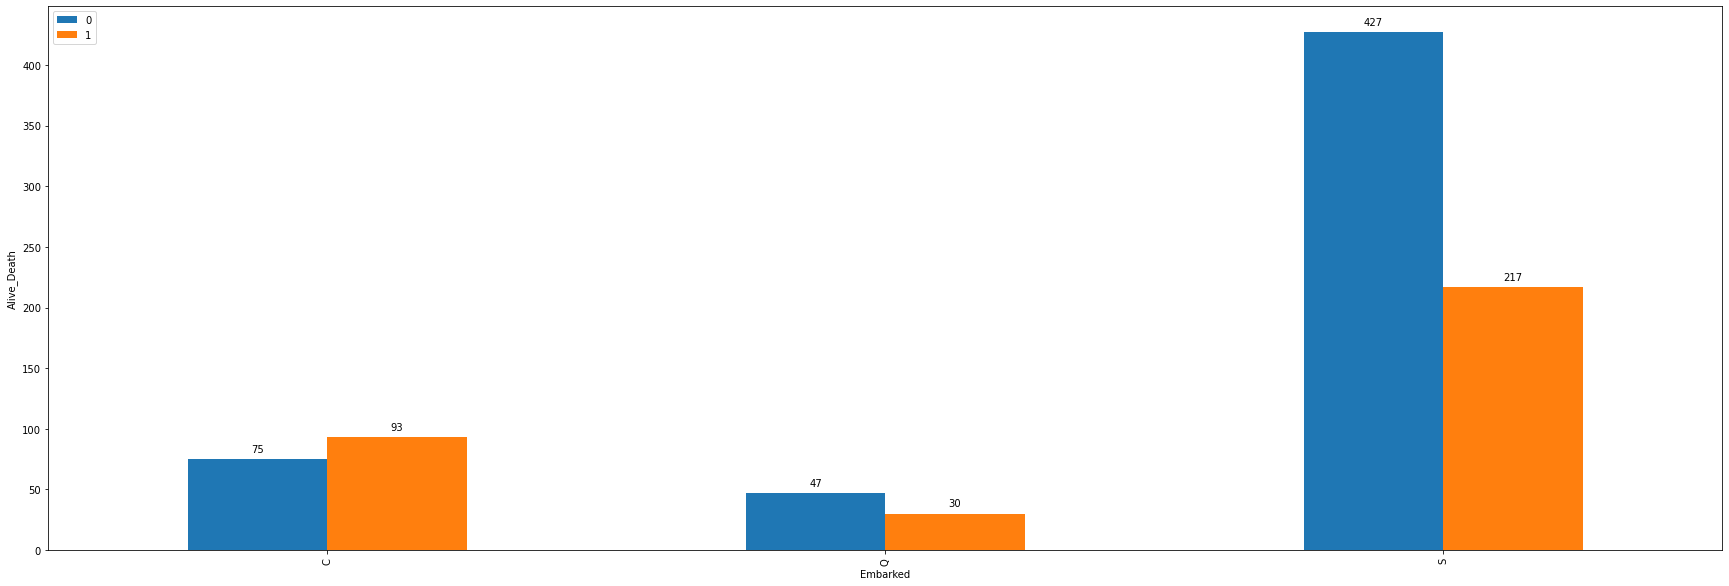

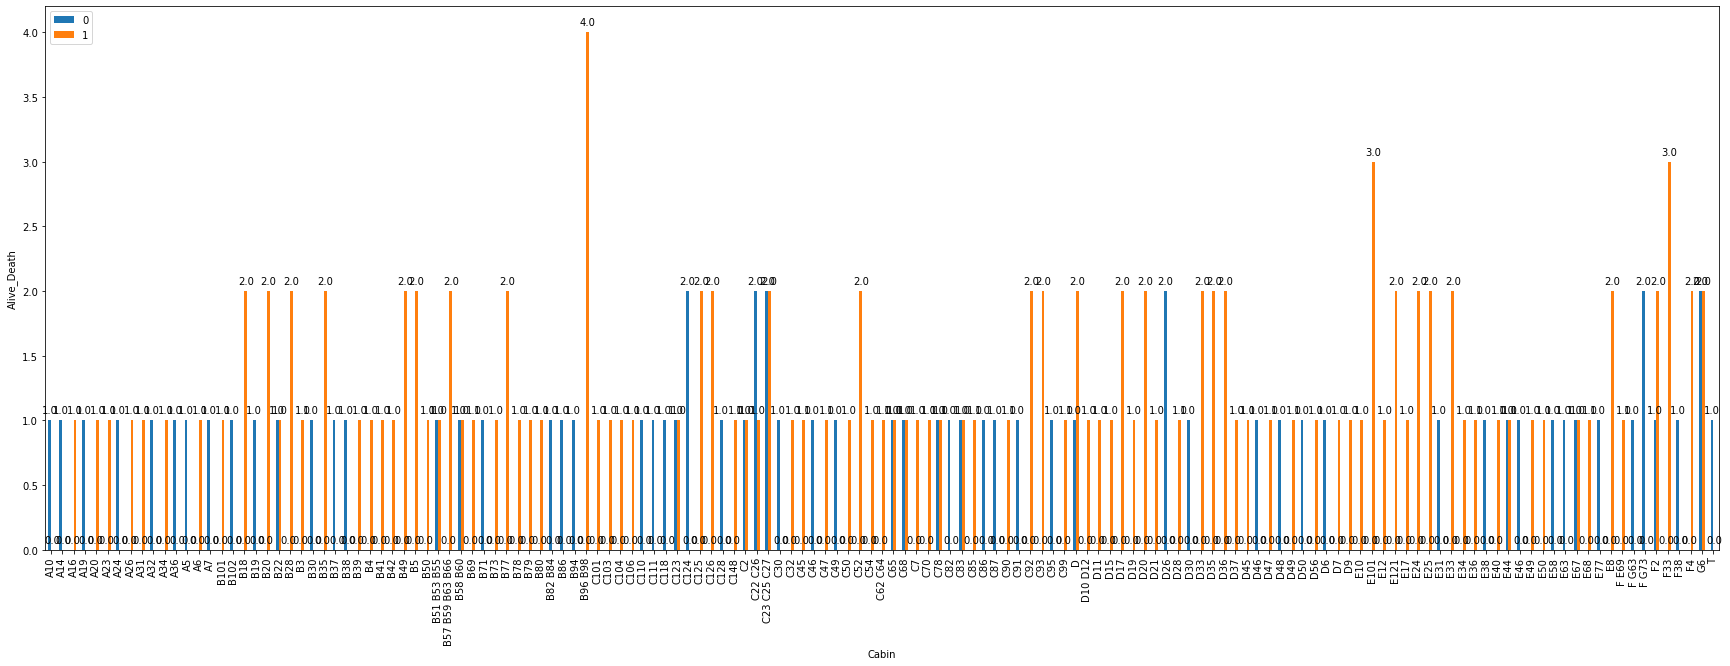

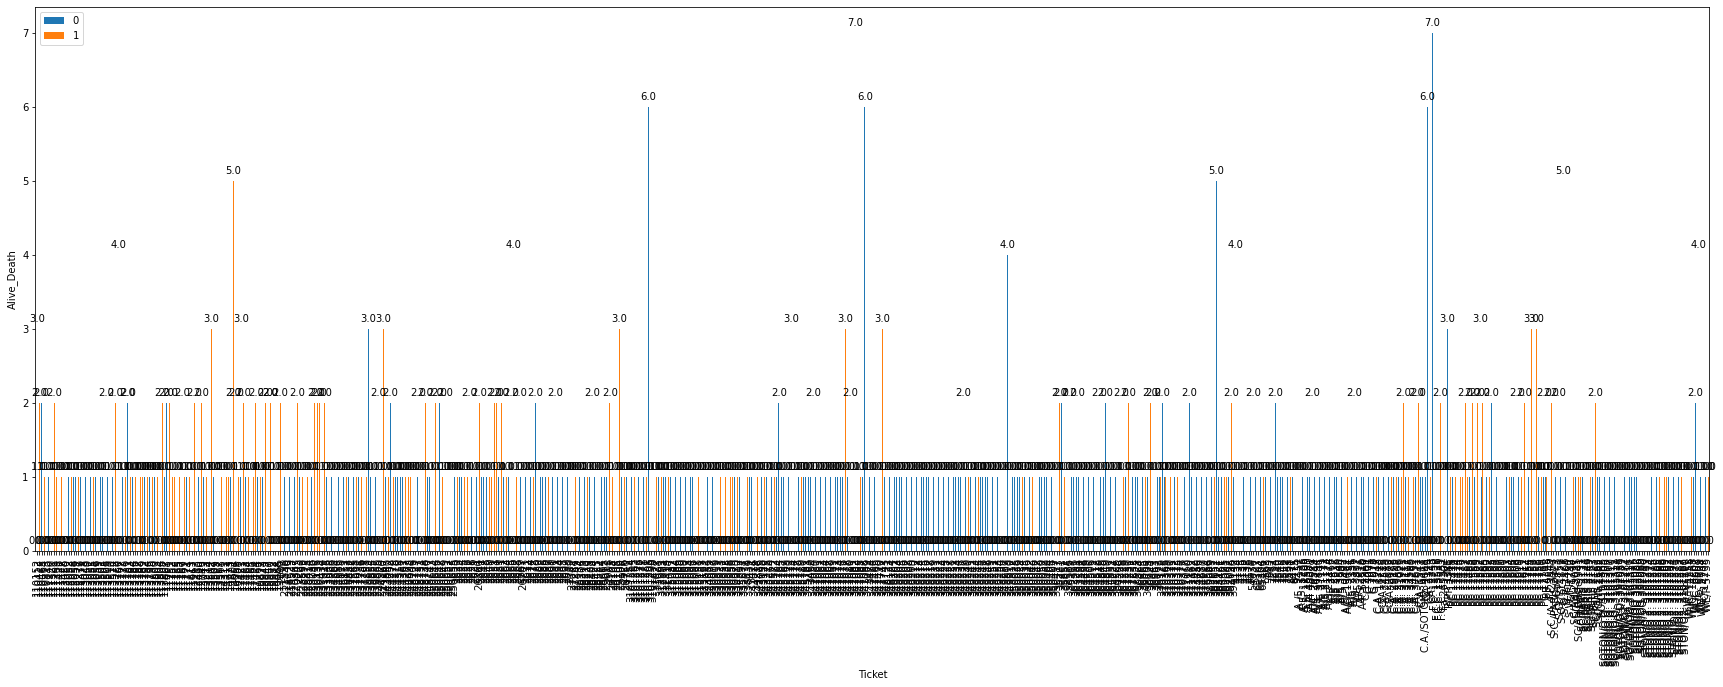

In [13]:
# For checking distribution of categorical columns - use value_counts()

grouped_df1 = titanic_train_df.groupby(['Survived'])['Sex'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
ax = grouped_df1.pivot("Sex", "Survived", "Count").plot(kind='bar', xlabel='Sex', ylabel='Alive_Death', figsize=(20,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
        
        
grouped_df2 = titanic_train_df.groupby(['Survived'])['Pclass'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
ax = grouped_df2.pivot("Pclass", "Survived", "Count").plot(kind='bar', xlabel='Pclass', ylabel='Alive_Death', figsize=(20,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

        
grouped_df3 = titanic_train_df.groupby(['Survived'])['Age'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
# grouped_df3 = grouped_df3[grouped_df3.groupby('Age', sort=False).ngroup()]
ax = grouped_df3.pivot("Age", "Survived", "Count").plot(kind='bar', xlabel='Age', ylabel='Alive_Death', figsize=(30,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
grouped_df4 = titanic_train_df.groupby(['Survived'])['SibSp'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
ax = grouped_df4.pivot("SibSp", "Survived", "Count").plot(kind='bar', xlabel='SibSp', ylabel='Alive_Death', figsize=(30,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

grouped_df5 = titanic_train_df.groupby(['Survived'])['Parch'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
ax = grouped_df5.pivot("Parch", "Survived", "Count").plot(kind='bar', xlabel='Parch', ylabel='Alive_Death', figsize=(30,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

grouped_df6 = titanic_train_df.groupby(['Survived'])['Embarked'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
ax = grouped_df6.pivot("Embarked", "Survived", "Count").plot(kind='bar', xlabel='Embarked', ylabel='Alive_Death', figsize=(30,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
        
# Others       
grouped_df7 = titanic_train_df.groupby(['Survived'])['Cabin'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
ax = grouped_df7.pivot("Cabin", "Survived", "Count").plot(kind='bar', xlabel='Cabin', ylabel='Alive_Death', figsize=(30,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

grouped_df8 = titanic_train_df.groupby(['Survived'])['Ticket'].value_counts().rename('Count').reset_index().sort_values(by='Count', ascending=False)
ax = grouped_df8.pivot("Ticket", "Survived", "Count").plot(kind='bar', xlabel='Ticket', ylabel='Alive_Death', figsize=(30,10))
plt.legend(loc='upper left')
for p in ax.patches:   
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
    

### **Inference**

#### Compare correlation between Survived (target variable) with other features.

* #### Survived, Sex - Females have higher chance of survival than males.
* #### Survived, Pclass
     - #### People of higher class have lesser death rate.
     - #### Chance of survival is seen higher for passengers of 1st and 3rd class.
* #### Survived, Age - Younger people have more survival rate than elderly.
* #### Survived, SibSp - People with more no:of siblings/spouses have less survival rate.
* #### Survived, Parch - People with more no:of parents/children have less survival rate.
* #### Survived, Embarked - People embarked from Southampton have less survival rate.

* #### Survived, Ticket - Large distribution which has potential for feature engineering.
* #### Survived, Cabin - Large distribution which has potential for feature engineering.

In [14]:
# Compare Average Survival Rate across 'Pclass', 'Sex', 'Embarked'
print(pd.pivot_table(titanic_train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_train_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


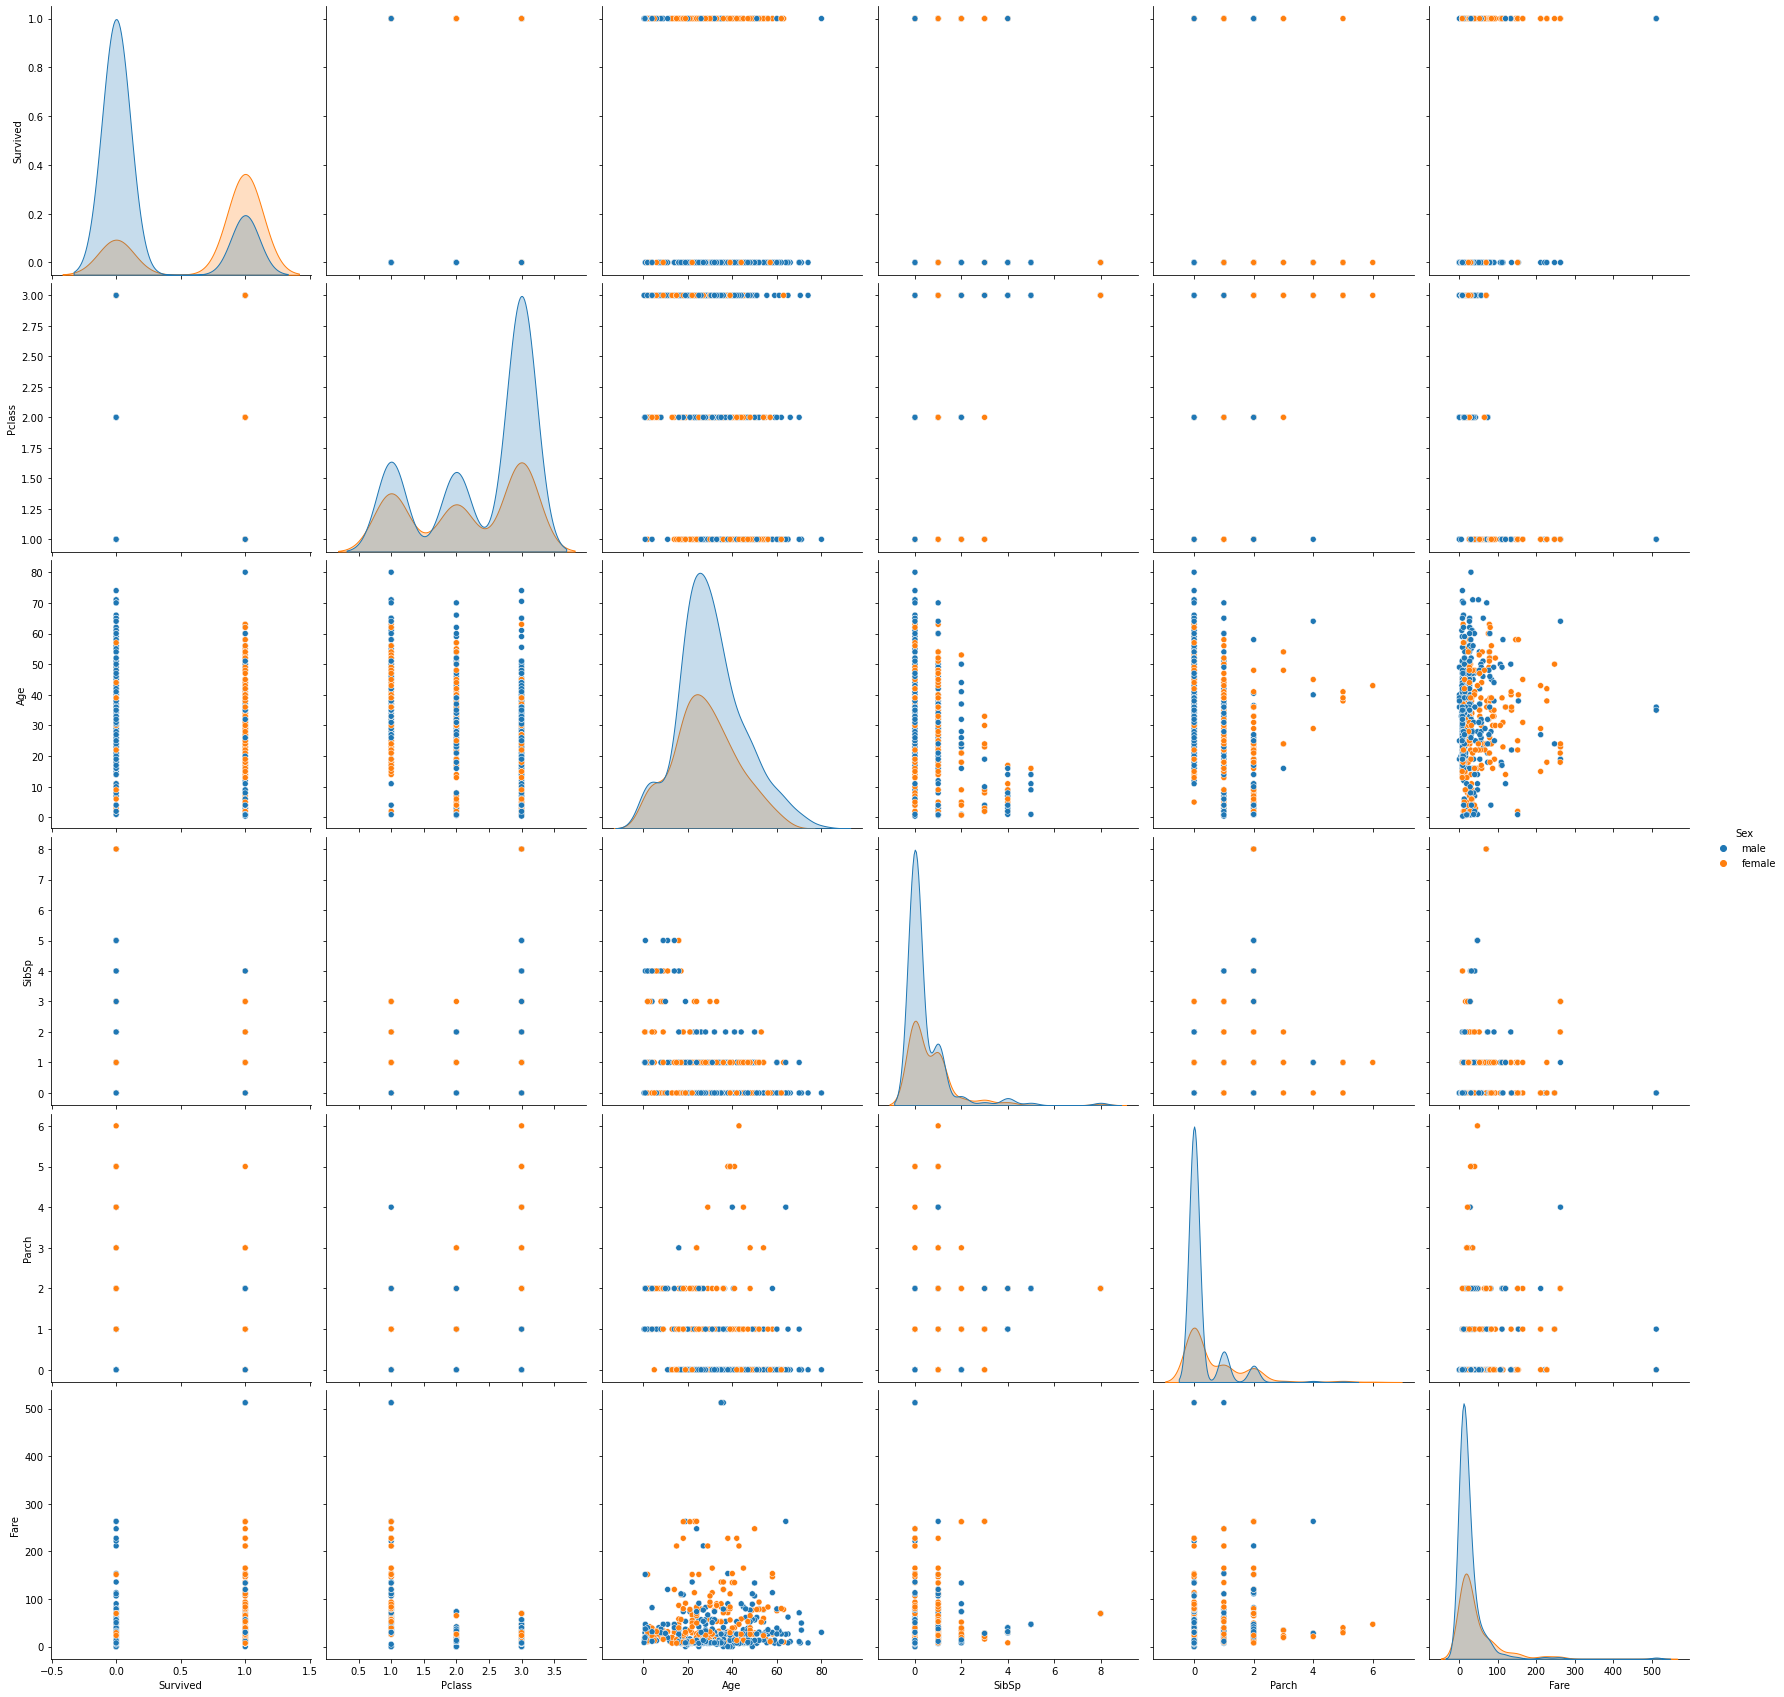

In [15]:
sns.pairplot(titanic_train_df[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Fare', 'Embarked']], hue='Sex', height = 4)

## **Feature Engineering**

In [16]:
# Check if Cabin values impact survival rate
titanic_train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
titanic_train_df[titanic_train_df['Cabin'] == 'D10 D12']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


In [18]:
# Deduce how many cabins are taken by each passenger
titanic_train_df['Multiple_Cabins'] = titanic_train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
titanic_train_df.Multiple_Cabins.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Multiple_Cabins, dtype: int64

In [19]:
# Find how many types of cabins are present
titanic_train_df['Cabin_Types'] = titanic_train_df['Cabin'].apply(lambda x:  str(x)[0])
titanic_train_df.Cabin_Types.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Types, dtype: int64

In [20]:
print(pd.pivot_table(titanic_train_df, index='Survived', columns='Multiple_Cabins', values = 'Name', aggfunc='count'))
print(pd.pivot_table(titanic_train_df, index='Survived', columns='Cabin_Types', values = 'Name', aggfunc='count'))

Multiple_Cabins      0      1    2    3    4
Survived                                    
0                481.0   58.0  7.0  3.0  NaN
1                206.0  122.0  9.0  3.0  2.0
Cabin_Types    A     B     C     D     E    F    G    T      n
Survived                                                      
0            8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1            7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


### **Inference**

#### Passengers can have multiple cabins. From the data, majority of the passengers who survived (around 200) didn't have multiple cabins.
#### There are different cabin types - C, B, D, E, A, F, G, T, n. n is for Null values and it can also be considered as a categorical value. Cabin category 'n' seems to have more survivors.
#### Cabin_Types can be taken as a categorical feature because it contributes to survival rate.

In [21]:
# Check if Ticket values impact survival rate
titanic_train_df['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
3101295     6
           ..
347062      1
345783      1
244361      1
315084      1
4135        1
Name: Ticket, Length: 681, dtype: int64

In [22]:
# Understand ticket values better 
# Find ticket numbers
titanic_train_df['Ticket_Numbers'] = titanic_train_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
titanic_train_df['Ticket_Numbers'].value_counts()

1    661
0    230
Name: Ticket_Numbers, dtype: int64

In [23]:
# Find different ticket types
titanic_train_df['Ticket_Types'] = titanic_train_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
titanic_train_df['Ticket_Types'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
pp             3
wep            3
swpp           2
scah           2
ppp            2
sotono2        2
as             1
fc             1
scow           1
sop            1
sca4           1
scahbasle      1
casoton        1
sc             1
sp             1
fa             1
Name: Ticket_Types, dtype: int64

In [24]:
print(pd.pivot_table(titanic_train_df, index='Survived', columns='Ticket_Numbers', values = 'Name', aggfunc='count'))
print(pd.pivot_table(titanic_train_df, index='Survived', columns='Ticket_Types', values = 'Name', aggfunc='count'))

Ticket_Numbers    0    1
Survived                
0               142  407
1                88  254
Ticket_Types      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                ...   
0             410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1             255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

Ticket_Types  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                     
0             5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1             1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0  

[2 rows x 29 columns]


### **Inference**

#### Ticket_Numbers - Tickets with numeric values are given category '1' while tickets with alphanumeric characters are given '0' category.
#### Ticket_Types - The string values in the ticket number is extracted. 
#### Since there are a lot of categories for ticket types with no specific relevance, Ticket_Numbers can be taken as the categorical feature. 

In [25]:
# Understand person names better 
titanic_train_df['Name_Title'] = titanic_train_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_train_df['Name_Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Ms                1
the Countess      1
Mme               1
Sir               1
Don               1
Jonkheer          1
Lady              1
Name: Name_Title, dtype: int64

In [26]:
pd.pivot_table(titanic_train_df, index='Survived', columns='Name_Title', values = 'Ticket', aggfunc='count')

Name_Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


### **Inference**

#### Majority of the survivors have noble titles in their names, indicating that royalty and people in high ranks had higher chance of survival than other passengers.

## **Data Preprocessing**

In [27]:
# Check for missing values
titanic_train_df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Multiple_Cabins      0
Cabin_Types          0
Ticket_Numbers       0
Ticket_Types         0
Name_Title           0
dtype: int64

<AxesSubplot:>

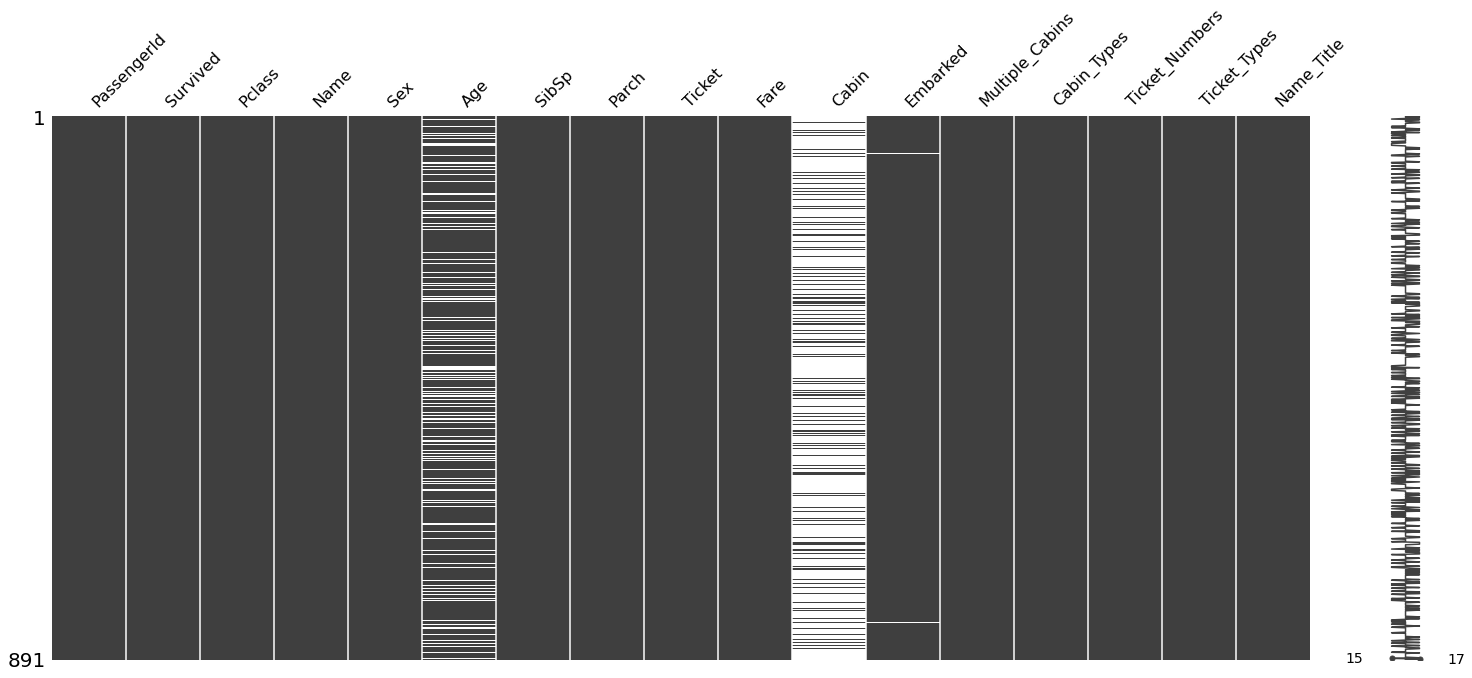

In [28]:
msno.matrix(titanic_train_df)

In [29]:
# Drop columns that have majority missing values and that contribute less in predicting target variable
# PassengerId, Name can be removed because they have no relation with the target variable and has no relevance
print("Dataset shape before dropping columns: ", titanic_train_df.shape)
titanic_train_df = titanic_train_df.drop(columns=['PassengerId', 'Name'])
print("Dataset shape after dropping columns: ", titanic_train_df.shape)

Dataset shape before dropping columns:  (891, 17)
Dataset shape after dropping columns:  (891, 15)


In [30]:
# Drop NaN from Embarked because it is the only column that hasn't been treated specially
print("Dataset shape before dropping NaN: ", titanic_train_df.shape)
titanic_train_df.dropna(subset=['Embarked'], inplace=True)
print("Dataset shape after dropping NaN: ", titanic_train_df.shape)

Dataset shape before dropping NaN:  (891, 15)
Dataset shape after dropping NaN:  (889, 15)


In [31]:
# Fill in the missing values by grouping data based on Sex, Pclass and finding median of Age in each group
titanic_train_df['Age'] = titanic_train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
titanic_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Multiple_Cabins,Cabin_Types,Ticket_Numbers,Ticket_Types,Name_Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,a5,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,pc,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,stono2,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,C,1,0,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,0,n,1,0,Rev
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,1,B,1,0,Miss
888,0,3,female,21.5,1,2,W./C. 6607,23.4500,NaN,S,0,n,0,wc,Miss
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,1,C,1,0,Mr


<AxesSubplot:>

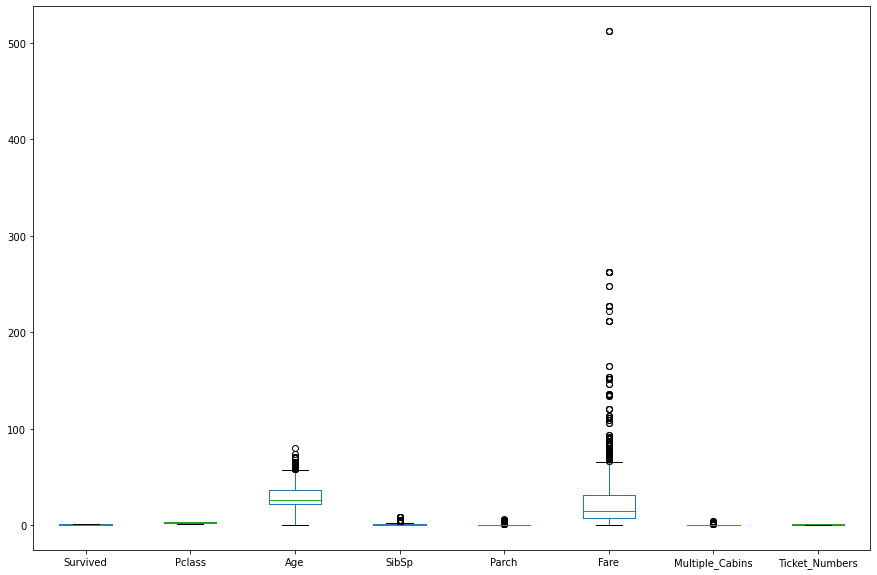

In [32]:
# Check for outliers using boxplot
titanic_train_df.plot(kind='box', figsize=(15,10))

In [33]:
# Identify and remove outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# Calculate summary statistics
data_mean, data_std = mean(titanic_train_df), std(titanic_train_df)

# Identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = titanic_train_df[((titanic_train_df < lower)|(titanic_train_df > upper)).any(axis=1)]
print('Identified outliers: ', outliers.shape)
# Remove outliers
final_titanic_train_df = titanic_train_df[((titanic_train_df >= lower)|(titanic_train_df <= upper)).any(axis=1)]
print('Non-outlier observations: ', final_titanic_train_df.shape)

Identified outliers:  (192, 15)
Non-outlier observations:  (889, 15)


In [34]:
# Remove outliers using IQR
# Q1 = titanic_train_df.quantile(0.25)
# Q3 = titanic_train_df.quantile(0.75)
# IQR = Q3 - Q1
# final_titanic_train_df = titanic_train_df[~((titanic_train_df < (Q1 - 1.5 * IQR))|(titanic_train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
# final_titanic_train_df.shape

In [35]:
# Encode categorical values - Sex, Embarked, Cabin_Types, Name_Title
final_titanic_train_df = pd.get_dummies(final_titanic_train_df, columns = ['Sex', 'Embarked', 'Cabin_Types', 'Name_Title'])
final_titanic_train_df

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Multiple_Cabins,Ticket_Numbers,...,Name_Title_Master,Name_Title_Miss,Name_Title_Mlle,Name_Title_Mme,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Name_Title_Sir,Name_Title_the Countess
0,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,113803,53.1000,C123,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,373450,8.0500,NaN,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,NaN,0,1,...,0,0,0,0,0,0,0,1,0,0
887,1,1,19.0,0,0,112053,30.0000,B42,1,1,...,0,1,0,0,0,0,0,0,0,0
888,0,3,21.5,1,2,W./C. 6607,23.4500,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,111369,30.0000,C148,1,1,...,0,0,0,0,1,0,0,0,0,0


### **Inference**

#### Shape of dataset after outlier removal using Standard Deviation method - (891, 8)
#### Shape of dataset after outlier removal using IQR method - (598, 8)
#### Standard Deviation method was chosen for outlier removal because it resulted in less data loss than IQR method.

## **Feature Selection**

In [36]:
# Select the features needed for model building
X = final_titanic_train_df[final_titanic_train_df.columns[~final_titanic_train_df.columns.isin(['Survived', 'Ticket', 'Cabin', 'Ticket_Types'])]]
y = final_titanic_train_df['Survived']

### **Inference**

#### All columns except 'Survived', 'Ticket', 'Cabin' are chosen as the features for model training.
#### The column 'Survived' is the target variable.

## **Model Training**

In [37]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
# SibSp, Parch, Fare showed right-skewed distribution, hence they should be normalized
sc = StandardScaler()
X_train[['SibSp','Parch','Fare']] = sc.fit_transform(X_train[['SibSp','Parch','Fare']])
X_test[['SibSp','Parch','Fare']] = sc.transform(X_test[['SibSp','Parch','Fare']])

(266, 38) (266,)


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [38]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Multiple_Cabins',
       'Ticket_Numbers', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_Types_A', 'Cabin_Types_B', 'Cabin_Types_C',
       'Cabin_Types_D', 'Cabin_Types_E', 'Cabin_Types_F', 'Cabin_Types_G',
       'Cabin_Types_T', 'Cabin_Types_n', 'Name_Title_Capt', 'Name_Title_Col',
       'Name_Title_Don', 'Name_Title_Dr', 'Name_Title_Jonkheer',
       'Name_Title_Lady', 'Name_Title_Major', 'Name_Title_Master',
       'Name_Title_Miss', 'Name_Title_Mlle', 'Name_Title_Mme', 'Name_Title_Mr',
       'Name_Title_Mrs', 'Name_Title_Ms', 'Name_Title_Rev', 'Name_Title_Sir',
       'Name_Title_the Countess'],
      dtype='object')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# Fit the model with data
logreg.fit(X_train,y_train)
cv = cross_val_score(logreg,X_train,y_train,cv=5)
print(cv)
print(cv.mean())
y_pred = logreg.predict(X_test)

[0.75925926 0.81132075 0.79245283 0.79245283 0.79245283]
0.7895877009084558


In [40]:
#  Classification Report - Before Model Tuning
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       385
           1       0.80      0.64      0.71       238

    accuracy                           0.80       623
   macro avg       0.80      0.77      0.78       623
weighted avg       0.80      0.80      0.80       623



In [41]:
from sklearn.model_selection import GridSearchCV 

# Simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train, y_train)
cv_new = cross_val_score(best_clf_lr,X_train,y_train,cv=5)
print(cv_new)
print(cv_new.mean())
y_pred_new = best_clf_lr.predict(X_test)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[0.75925926 0.81132075 0.79245283 0.79245283 0.83018868]
0.7971348707197764
Logistic Regression
Best Score: 0.8083158630328443
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished


In [42]:
# # Features and the impact they had on the model prediction
# best_lr = best_clf_lr.best_estimator_.fit(X_train, y_train)
# feat_importances = pd.Series(best_lr.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(20).plot(kind='barh')

In [43]:
#  Classification Report - After Model Tuning
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       385
           1       0.80      0.63      0.71       238

    accuracy                           0.80       623
   macro avg       0.80      0.77      0.78       623
weighted avg       0.80      0.80      0.79       623



## **Model Evaluation**

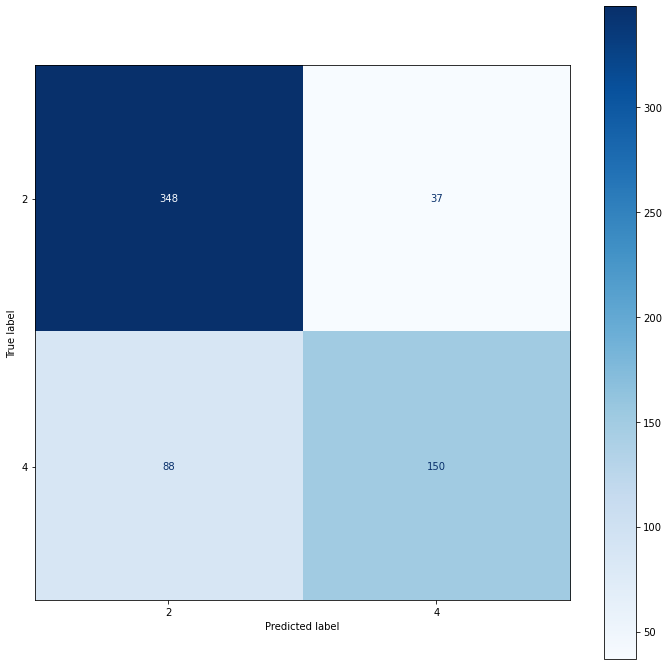

In [44]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_new, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[2,4])
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format='g', ax=ax)

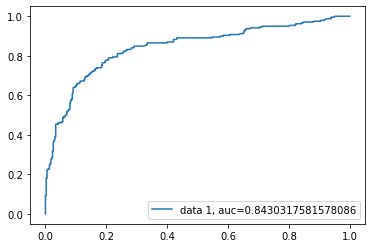

In [45]:
# ROC Curve
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate.
# It shows the tradeoff between sensitivity and specificity.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Model Testing**

In [46]:
# Read the dataset
titanic_test_df = pd.read_csv(data_path + "test.csv")
titanic_test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
# Deduce how many cabins are taken by each passenger
titanic_test_df['Multiple_Cabins'] = titanic_test_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
titanic_test_df.Multiple_Cabins.value_counts()


# Find how many types of cabins are present
titanic_test_df['Cabin_Types'] = titanic_test_df['Cabin'].apply(lambda x:  str(x)[0])
titanic_test_df.Cabin_Types.value_counts()


# Understand ticket values better 
# Find ticket numbers
titanic_test_df['Ticket_Numbers'] = titanic_test_df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
titanic_test_df['Ticket_Numbers'].value_counts()


# Find different ticket types
titanic_test_df['Ticket_Types'] = titanic_test_df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
titanic_test_df['Ticket_Types'].value_counts()


# Understand person names better 
titanic_test_df['Name_Title'] = titanic_test_df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_test_df['Name_Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Name_Title, dtype: int64

In [48]:
# Drop columns that have majority missing values and that contribute less in predicting target variable
# PassengerId, Name can be removed because they have no relation with the target variable and has no relevance
print("Dataset shape before dropping columns: ", titanic_test_df.shape)
titanic_test_df = titanic_test_df.drop(columns=['Name'])
print("Dataset shape after dropping columns: ", titanic_test_df.shape)


# Drop NaN from Embarked and Fare
# print("Dataset shape before dropping NaN: ", titanic_test_df.shape)
# titanic_test_df.dropna(subset=['Embarked', 'Fare'], inplace=True)
# print("Dataset shape after dropping NaN: ", titanic_test_df.shape)


# Fill in the missing values by grouping data based on Sex, Pclass and finding median of Age in each group
print("Dataset shape before filling NaN: ", titanic_test_df.shape)
titanic_test_df['Age'] = titanic_test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill in the missing values in Fare by the median
titanic_test_df['Fare'] = titanic_test_df['Fare'].transform(lambda x: x.fillna(x.median()))

# Fill in the missing values in Embarked by imputation
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
titanic_test_df.Embarked = imputer.fit_transform(titanic_test_df['Embarked'].values.reshape(-1,1))[:,0]
print("Dataset shape after filling NaN: ", titanic_test_df.shape)



# Identify and remove outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# Calculate summary statistics
data_mean, data_std = mean(titanic_test_df), std(titanic_test_df)

# Identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = titanic_test_df[((titanic_test_df < lower)|(titanic_test_df > upper)).any(axis=1)]
print('Identified outliers: ', outliers.shape)
# Remove outliers
final_titanic_test_df = titanic_test_df[((titanic_test_df >= lower)|(titanic_test_df <= upper)).any(axis=1)]
print('Non-outlier observations: ', final_titanic_test_df.shape)


# Encode categorical values - Sex, Embarked, Cabin_Types, Name_Title
final_titanic_test_df = pd.get_dummies(final_titanic_test_df, columns = ['Sex', 'Embarked', 'Cabin_Types', 'Name_Title'])
final_titanic_test_df

Dataset shape before dropping columns:  (418, 16)
Dataset shape after dropping columns:  (418, 15)
Dataset shape before filling NaN:  (418, 15)
Dataset shape after filling NaN:  (418, 15)
Identified outliers:  (68, 15)
Non-outlier observations:  (418, 15)


,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Multiple_Cabins,Ticket_Numbers,...,Cabin_Types_n,Name_Title_Col,Name_Title_Dona,Name_Title_Dr,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev
0,892,3,34.5,0,0,330911,7.8292,NaN,0,1,...,1,0,0,0,0,0,1,0,0,0
1,893,3,47.0,1,0,363272,7.0000,NaN,0,1,...,1,0,0,0,0,0,0,1,0,0
2,894,2,62.0,0,0,240276,9.6875,NaN,0,1,...,1,0,0,0,0,0,1,0,0,0
3,895,3,27.0,0,0,315154,8.6625,NaN,0,1,...,1,0,0,0,0,0,1,0,0,0
4,896,3,22.0,1,1,3101298,12.2875,NaN,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,A.5. 3236,8.0500,NaN,0,0,...,1,0,0,0,0,0,1,0,0,0
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,1,0,...,0,0,1,0,0,0,0,0,0,0
415,1307,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,...,1,0,0,0,0,0,1,0,0,0
416,1308,3,24.0,0,0,359309,8.0500,NaN,0,1,...,1,0,0,0,0,0,1,0,0,0


In [49]:
# Select the features needed for model building
test_features = final_titanic_test_df[final_titanic_test_df.columns[~final_titanic_test_df.columns.isin(['PassengerId', 'Ticket', 'Cabin', 'Ticket_Types', 'Name_Title_Dona'])]]
test_features[['Name_Title_Lady',
 'Name_Title_Capt',
 'Name_Title_Don',
 'Name_Title_the Countess',
 'Name_Title_Jonkheer',
 'Name_Title_Mme',
 'Cabin_Types_T',
 'Name_Title_Sir',
 'Name_Title_Mlle',
 'Name_Title_Major']] = 0
print('test_features', test_features.shape)

# Predict test set using fine-tuned model
final_titanic_test_df['Survived'] = best_clf_lr.predict(test_features)
final_titanic_test_df

test_features (418, 38)


D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan


,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Multiple_Cabins,Ticket_Numbers,...,Name_Title_Col,Name_Title_Dona,Name_Title_Dr,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Survived
0,892,3,34.5,0,0,330911,7.8292,NaN,0,1,...,0,0,0,0,0,1,0,0,0,1
1,893,3,47.0,1,0,363272,7.0000,NaN,0,1,...,0,0,0,0,0,0,1,0,0,1
2,894,2,62.0,0,0,240276,9.6875,NaN,0,1,...,0,0,0,0,0,1,0,0,0,1
3,895,3,27.0,0,0,315154,8.6625,NaN,0,1,...,0,0,0,0,0,1,0,0,0,1
4,896,3,22.0,1,1,3101298,12.2875,NaN,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,A.5. 3236,8.0500,NaN,0,0,...,0,0,0,0,0,1,0,0,0,1
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,1,0,...,0,1,0,0,0,0,0,0,0,1
415,1307,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,...,0,0,0,0,0,1,0,0,0,1
416,1308,3,24.0,0,0,359309,8.0500,NaN,0,1,...,0,0,0,0,0,1,0,0,0,1


In [50]:
titanic_gender_df = pd.read_csv(data_path + "gender_submission.csv")
titanic_gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
merged_df = pd.merge(titanic_gender_df, final_titanic_test_df[['PassengerId', 'Survived']], on='PassengerId')
merged_df['Status'] = merged_df.apply(lambda x: True if x['Survived_x'] == x['Survived_y'] else False, axis=1)
merged_df[merged_df['Status'] == False]

,PassengerId,Survived_x,Survived_y,Status
0,892,0,1,False
2,894,0,1,False
3,895,0,1,False
5,897,0,1,False
7,899,0,1,False
...,...,...,...,...
407,1299,0,1,False
413,1305,0,1,False
415,1307,0,1,False
416,1308,0,1,False


In [52]:
final_titanic_test_df[final_titanic_test_df['Survived'] == 0]

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Multiple_Cabins,Ticket_Numbers,...,Name_Title_Col,Name_Title_Dona,Name_Title_Dr,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Survived
21,913,3,9.0,0,1,C 17368,3.1708,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
266,1158,1,42.0,0,0,112051,0.0000,NaN,0,1,...,0,0,0,0,0,1,0,0,0,0
372,1264,1,49.0,0,0,112058,0.0000,B52 B54 B56,3,1,...,0,0,0,0,0,1,0,0,0,0


In [53]:
submission = final_titanic_test_df[['PassengerId', 'Survived']]
submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [54]:
submission.to_csv(data_path + "titanic_submission.csv", index=False)